# Linear Regression - A Mathematical Approach
* Author - Sanjay S Rao
* LinkedIn - https://www.linkedin.com/in/sanjay-srinivasa-rao-b67a771a0/
* e-mail - sanjay.s.rao04@gmail.com

## Dataset
We will use `Boston` dataset from `sklearn`, we saw it previously, easy stuff by now. Let's also split it into validation and test:

In [1]:
from sklearn import datasets, model_selection

# 15% for validation and test, 70% for train in total
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

X_validation, X_test, y_validation, y_test = model_selection.train_test_split(
    X_test, y_test, test_size=0.5
)

print(X_train.shape, y_train.shape)

(354, 13) (354,)


## Linear Regression?

__Linear Regression__ is a machine learning algorithm based on __supervised learning__. It performs a regression task. __Regression models__ a _target prediction_ value based on _independent variables_. It is mostly used for finding out the relationship between `variables` and `forecasting`.

__Linear Regression__ predicts continuous outputs. It makes predictions that are simply a __weighted combination__ (a linear combination) of inputs (plus some offset called __bias__).
$$
    y = wx + b
$$

__Graphical representation:__
<div>
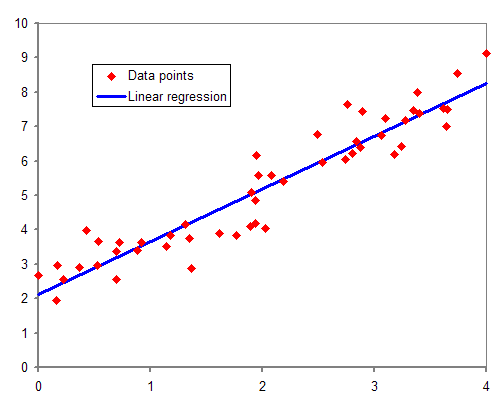
</div>

## Mathematical formula of model

Formula below represents linear regression for single dependent variable __but multiple features__:

$$
\begin{equation}
    y = w_1x_1 + w_2x_2 + ... + w_Nx_N + b = \sum_{i=1}^{N} w_ix_i + b
\end{equation}
$$

## Exercise

`LinearRegression` implementation:

- Create a class `LinearRegression` which takes a single `n_features` argument during initialization.
    - Create `W` and `b` variables inside initialization. One of shape `(n_features, 1)` and `bias` of shape `1` initialized with random normal distribution
- Create `__call__` function (what does it do, what is a functor?) which takes `X` (`np.array`). It should return predictions our linear regression should do (see formulas above in the picture, it's two operations only)
- Create `update_params` function which takes `W` and `b` and assigns them to appropriate variables in `self`.

In [2]:
import numpy as np

class LinearRegression:
    def __init__(self, n_features: int): # initalize parameters 
        self.W = np.random.randn(n_features, 1) # randomly initialise weight
        self.b = np.random.randn(1) # randomly initialise bias
        
    def __call__(self, X): # how do we calculate output from an input in our model?
        ypred = np.dot(X, self.W) + self.b
        return ypred # return prediction
    
    def update_params(self, W, b):
        self.W = W # set this instance's weights to the new weight value passed to the function
        self.b = b # do the same for the bias

In [3]:
model = LinearRegression(n_features=13)  # instantiate our linear model
y_pred = model(X_train)  # make prediction on data
print("Predictions:\n", y_pred[:10]) # print first 10 predictions

Predictions:
 [[1477.26490316]
 [1377.7055559 ]
 [1072.97985409]
 [1205.0475264 ]
 [1452.23323542]
 [ 975.02798405]
 [1342.33714074]
 [1156.17817664]
 [1389.02565258]
 [1358.36893915]]


In [4]:
import matplotlib.pyplot as plt

def plot_predictions(y_pred, y_true):
    samples = len(y_pred)
    plt.figure()
    plt.scatter(np.arange(samples), y_pred, c='r', label='predictions')
    plt.scatter(np.arange(samples), y_true, c='b', label='true labels', marker='x')
    plt.legend()
    plt.xlabel('Sample numbers')
    plt.ylabel('Values')
    plt.show()

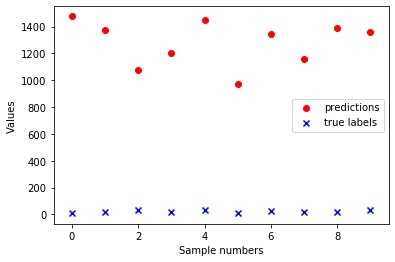

In [5]:
plot_predictions(y_pred[:10], y_train[:10])

## Analysis

As you can see predictions of our model are __way off__. This happened because we initialized our model with random weights and bias.

Now, we should learn how we can improve this model to learn from data:

The values `w` and `b` (the _slope_ and the _intercept_) must be chosen so that they __minimize the error__. If sum of squared error is taken as a metric to evaluate the model, then _goal_ to obtain a line that best reduces the error.


<div>
    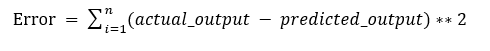
</div>

### For model with one predictor:

`Intercept Calculation`
<div>
    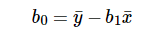
</div>

`Co-efficient Formula`
<div>
    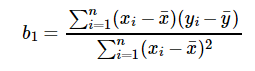
</div>

In [6]:
def mean_squared_error(y_pred, y_true):  # define our criterion (loss function)
    errors = y_pred - y_true  ## calculate errors
    squared_errors = errors ** 2  ## square errors
    return np.mean(squared_errors) ##MSEval

In [7]:
cost = mean_squared_error(y_pred, y_train)
print(cost)

1763313.584803964


### Co-efficient from Normal equations
Apart from above equation co-efficient of the model can also be calculated from normal equation.

<div>
    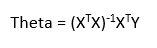
</div>

`Theta` contains co-efficient of all predictors including constant term ‘b0’. Normal equation performs computation by taking _inverse_ of input matrix. Complexity of the computation will increase as the number of features increase. It gets very slow when number of features grow large.

### Exercise

Now that we have mathematical formula we can jump in straight to the implementation.

- For matrix inverse, you can use [`np.linalg.inv`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html) function
- Remember to return `weights` part of `matrix` first and `bias` after that (`bias` is the `0` element of the result)

In [8]:
def minimize_loss(X_train, y_train):
    X_with_bias = np.hstack((np.ones((X_train.shape[0], 1)), X_train))
    
    # theta value
    optimal_w = np.matmul(
        np.linalg.inv(np.matmul(X_with_bias.T, X_with_bias)),
        np.matmul(X_with_bias.T, y_train),
    )
    return optimal_w[1:], optimal_w[0]


weights, bias = minimize_loss(X_train, y_train)
print(weights, bias)

[-1.15629395e-01  3.14348060e-02  8.83624615e-02  2.15387819e+00
 -1.89377893e+01  4.69848170e+00 -7.11208596e-03 -1.30681348e+00
  2.60167472e-01 -1.24302391e-02 -1.07133025e+00  1.04324920e-02
 -3.99675931e-01] 31.518399661223157


## Update parameters

Now that we have found `optimal_w` we should update our model and see how it performs:

In [9]:
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

20.569063940836664


We observe that the error rate has reduced from the previous ---- to ----

We should talk about scale though... Let's plot our labels with respect to certain features to see how that looks:

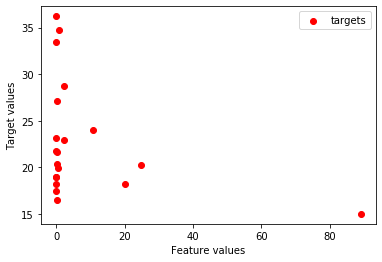

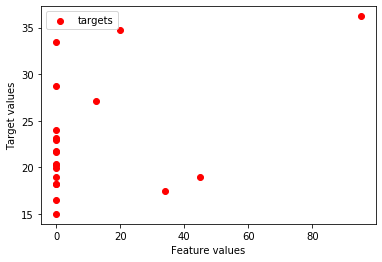

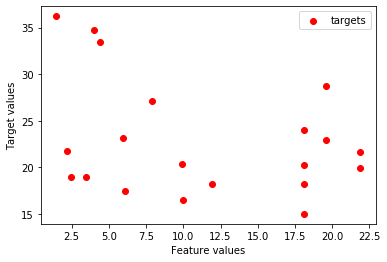

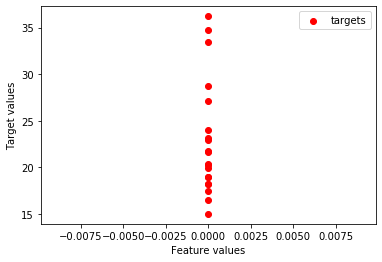

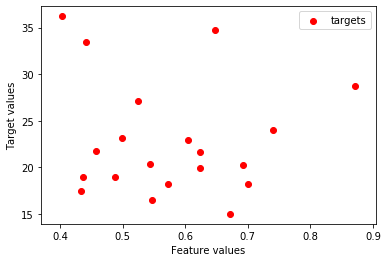

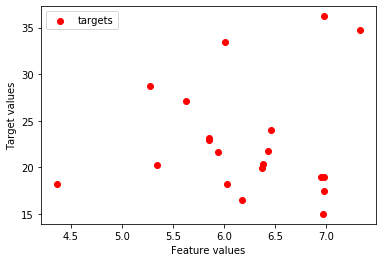

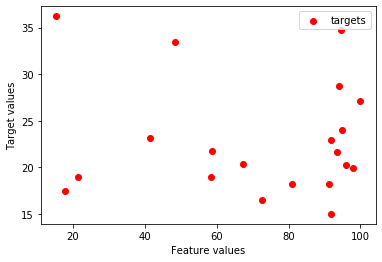

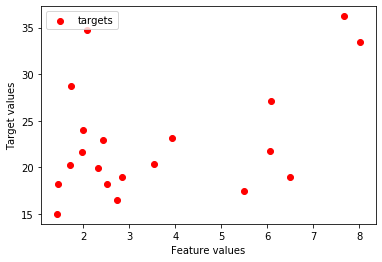

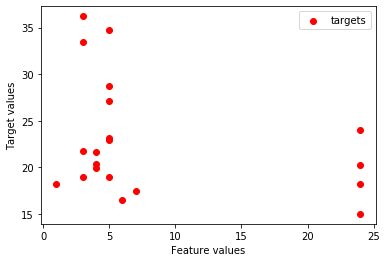

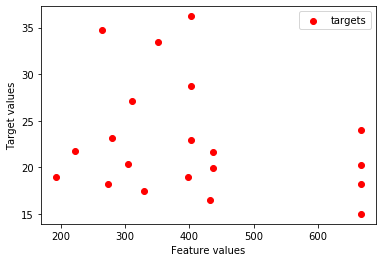

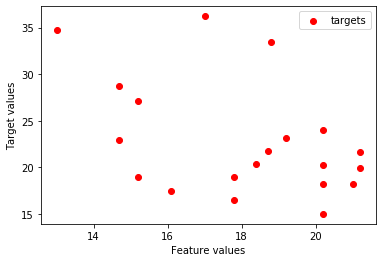

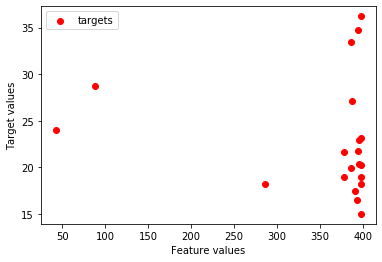

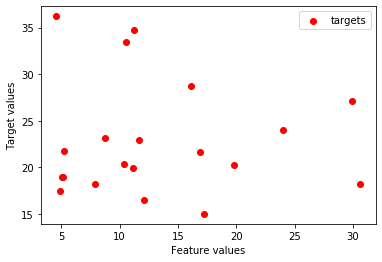

In [10]:
def plot_feature_label(X_train, y_true, feature, n_samples: int = 20):
    features = X_train[:n_samples, feature]
    labels = y_true[:n_samples]
    plt.figure()
    plt.scatter(features, labels, c='r', label='targets')
    plt.legend()
    plt.xlabel('Feature values')
    plt.ylabel('Target values')
    plt.show()


for i in range(13):
    plot_feature_label(X_train, y, i, 20)

## Data normalization & standardization

As you could notice in our plot above different features has different value ranges.
- some features were binary or between `[0, 1]`
- others has values ranging in hundreds or even thousands

This is problematic to most of machine learning models.

## Why to standardize before fitting a ML model?
Well, the idea is simple. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized (μ=0, σ=1) is usually used prior to model fitting.

## Core of the method
The main idea is to normalize/standardize i.e. μ = 0 and σ = 1 your features/variables/columns of X, individually, before applying any machine learning model.

<div>
    <img src= attachment:image.png width="200" />
</div>
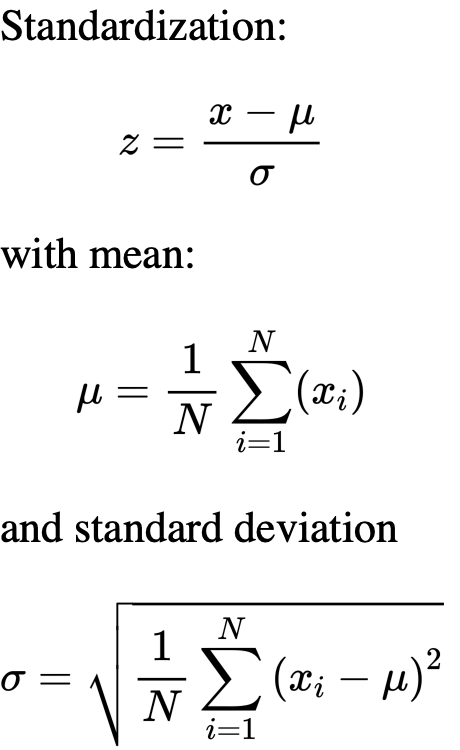

In [11]:
def standardize_data(dataset, mean=None, std=None):
    if mean is None and std is None:
        mean, std = np.mean(dataset, axis=0), np.std(
            dataset, axis=0
        )  ## get mean and standard deviation of dataset
    standardized_dataset = (dataset - mean) / std
    return standardized_dataset, (mean, std)

X_train, (mean, std) = standardize_data(X_train)

## Test again

Now that we have our data standardized, let's see how our model performs

In [12]:
weights, bias = minimize_loss(X_train, y_train)
model.update_params(weights, bias)
y_pred = model(X_train)
cost = mean_squared_error(y_pred, y_train)
print(cost)

20.569063940836656


## Summary

- Linear regression is the "hello world" basic machine learning model.
- Linear regression updates it's weight vector and bias in order to improve on the task.
- This update can be carried out via analytically calculated formula.
- The MSE loss is appropriate for many regression problems and is the most common loss function for this task.
- Normalization scheme almost always improves our scores __sometimes our solution will diverge without it!__